# LAB 2: Loops, branching, input, output (first plots)

### 1. Read (carefully!) Chapters 3 and 4 from the Student's Guide and complete all the "Your Turns".

a) Your Turn 3A

In [101]:
import numpy as np, scipy.special as sci
x = np.arange(-10, 10, 1)
y = np.exp(-(x**2))
print(y)

print()

n = np.arange(0, 10, 1)
z = np.exp(-2) * 2**n / sci.factorial(n)
print(z)

[3.72007598e-44 6.63967720e-36 1.60381089e-28 5.24288566e-22
 2.31952283e-16 1.38879439e-11 1.12535175e-07 1.23409804e-04
 1.83156389e-02 3.67879441e-01 1.00000000e+00 3.67879441e-01
 1.83156389e-02 1.23409804e-04 1.12535175e-07 1.38879439e-11
 2.31952283e-16 5.24288566e-22 1.60381089e-28 6.63967720e-36]

[1.35335283e-01 2.70670566e-01 2.70670566e-01 1.80447044e-01
 9.02235222e-02 3.60894089e-02 1.20298030e-02 3.43708656e-03
 8.59271640e-04 1.90949253e-04]


b) Your Turn 4A

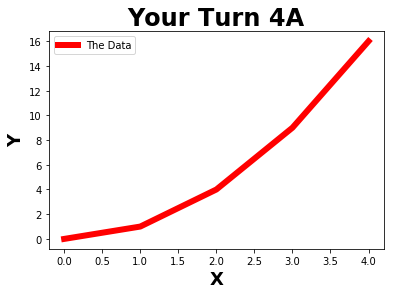

In [86]:
import numpy as np, matplotlib.pyplot as plt
num_points = 5
x_min, x_max = 0, 4
x_values = np.linspace(x_min, x_max, num_points)
y_values = x_values**2
plt.plot(x_values, y_values, linewidth=6, color='r', label="The Data")
plt.title("Your Turn 4A", size=24, weight='bold')
plt.xlabel("X", size=18, weight='bold')
plt.ylabel("Y", size=18, weight='bold')
plt.legend()
plt.show()

c) Your Turn 4B

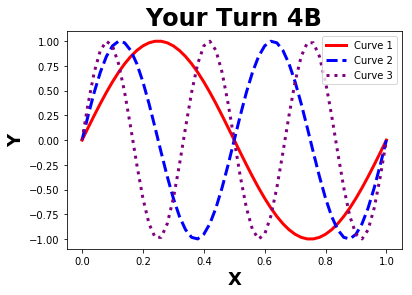

In [73]:
num_curves = 3
x = np.linspace(0, 1, 51)
y = np.zeros((x.size, num_curves))
for n in range(num_curves):
    y[:, n] = np.sin((n+1) * x * 2 * np.pi)
plt.plot(x, y)
plt.title("Your Turn 4B", size=24, weight='bold')

ax = plt.gca()
lines = ax.get_lines()
for i in range(num_curves):
    lines[i].set_label("Curve " + str(i + 1))
plt.setp(lines[0], linestyle = '-', linewidth = 3, color = 'r')
plt.setp(lines[1], linestyle = '--', linewidth = 3, color = 'b')
plt.setp(lines[2], linestyle = ':', linewidth = 3, color = 'purple')

plt.xlabel("X", size=18, weight='bold')
plt.ylabel("Y", size=18, weight='bold')

plt.legend()
plt.show()

### 2. Plot the following function in the interval [-15, 15]:

$y=\frac{\text{cos}x}{1+\frac{1}{5}x^2}$

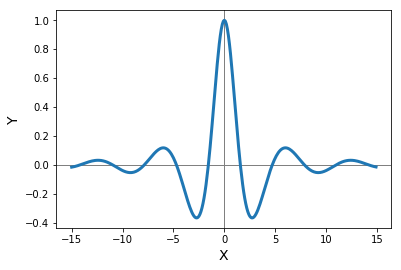

In [5]:
import matplotlib.pyplot as plt, numpy as np

x_values = np.arange(-15, 15, 0.1)
y_values = np.cos(x_values) / (1 + 0.2*x_values**2)

plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

plt.plot(x_values, y_values, linewidth=3)

plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

#### Include enough points so that the curve appears smooth. Draw thin gray lines behind the function at $x=0$ and $y=0$. Label both axis!

### 3. Create a data file with the data show below:

 t       y       dy
1.0      2.94    0.7
4.5      8.29    1.2
8.0      9.36    1.2
11.5    11.60    1.4 
15.0     9.32    1.3
18.5     7.75    1.1
22.0     8.06    1.2
25.5     5.60    1.0
29.0     4.50    0.8
32.5     4.01    0.8
36.0     2.62    0.7
39.5     1.70    0.6
43.0     2.03    0.6


#### a) Read the data into the Python script and plot $y$ vs. $t$ using circles for data points with error bars. Use the data in the $dy$ column as the error estimates for the $y$ data. Label the horizontal and vertical axes "time (s)" and "position (cm)". create your plot using the fig, ax=plt.subplots() syntax.

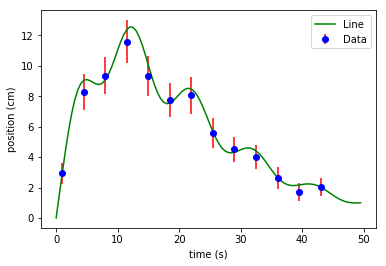

In [93]:
fig, ax = plt.subplots(1, 1, sharex='all', sharey='all')

t = np.arange(0, 50, 0.5)
y = (3+(0.5*np.sin(np.pi*t/5)))*t*np.exp(-t/10)
plt.plot(t, y, 'g', label="Line")

values = np.loadtxt("Lab2_DataFile.txt")
t_values, y_values, dy_values = values.T
plt.errorbar(t_values, y_values, yerr=dy_values, fmt='bo', ecolor="red", label="Data")

plt.xlabel('time (s)')
plt.ylabel('position (cm)')
ax.legend()
plt.show()

#### b) On the same graph, plot the function below as a smooth line. Make the line pass behind the data points. Include a legend within the plot to label the data and the line.

$y(t)=\left (3+\frac{1}{2}\text{sin}\frac{\pi t}{5}\right)te^{-t/10}$

### 4. The data below was obtained for the displacement (position) vs time of a falling object, together with the estimated uncertainty in the position.

time (s)    position (m)   uncertainty (m)
0.0           0.0          0.04
0.5           1.3          0.12  
1.0           5.1          0.2
1.5          10.9          0.3
2.0          18.9          0.4
2.5          28.7          0.4
3.0          40.3          0.5
3.5          53.1          0.6
4.0          67.5          0.6
4.5          82.3          0.6
5.0          97.6          0.7
5.5         113.8          0.7
6.0         131.2          0.7
6.5         148.5          0.7
7.0         166.2          0.7
7.5         184.2          0.7
8.0         201.6          0.7
8.5         220.1          0.7
9.0         238.3          0.7
9.5         256.5          0.7
10.0        275.6          0.8 

#### a) Use these data to calculate the velocity and acceleration, together wth their uncertainties propagated from the displacement vs. time uncertainties. be sure to calculate time arrays corresponding to the midpoint in time between two displacements or velocities for the velocity and acceleration arrays.

In [143]:
values = np.loadtxt("Lab2_DataFile2.txt")
time, position, uncertainty = values.T
velocity = []
v_err = []
acceleration = []
a_err = []
midtime = []
midtime2 = []

for i in range(1, len(time)):
    midtime.append((time[i]+time[i-1])/2)

for j in range(1, len(position)):
    velocity.append(round((position[j]-position[j-1])/(time[j]-time[j-1])))

for k in range(1, len(midtime)):
    midtime2.append((midtime[k]+midtime[k-1])/2)

for m in range(1, len(velocity)):
    acceleration.append(round((velocity[m]-velocity[m-1])/(midtime[m]-midtime[m-1])))

for m in range(1, len(uncertainty)):
    v_err.append(uncertainty[m]+uncertainty[m-1])
    
for n in range(1, len(v_err)):
    a_err.append(v_err[n]+v_err[n-1])
    
print("The velocity is given by: ", velocity)   
print("The velocity's uncertainty is given by: ", v_err) 
print()
print("The acceleration is given by: ", acceleration)
print("The acceleration's uncertainty is given by: ", a_err)

The velocity is given by:  [3.0, 8.0, 12.0, 16.0, 20.0, 23.0, 26.0, 29.0, 30.0, 31.0, 32.0, 35.0, 35.0, 35.0, 36.0, 35.0, 37.0, 36.0, 36.0, 38.0]
The velocity's uncertainty is given by:  [0.16, 0.32, 0.5, 0.7, 0.8, 0.9, 1.1, 1.2, 1.2, 1.2999999999999998, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5]

The acceleration is given by:  [10.0, 8.0, 8.0, 8.0, 6.0, 6.0, 6.0, 2.0, 2.0, 2.0, 6.0, 0.0, 0.0, 2.0, -2.0, 4.0, -2.0, 0.0, 4.0]
The acceleration's uncertainty is given by:  [0.48, 0.8200000000000001, 1.2, 1.5, 1.7000000000000002, 2.0, 2.3, 2.4, 2.5, 2.6999999999999997, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.9]


#### b) In a single window frame, make three vertically stacked plots of the displacement, velocity and acceleration vs time. Show the error bars on the different plots. Make sure that the time axes of all three plots cover the same range of times (check the use of sharex!).

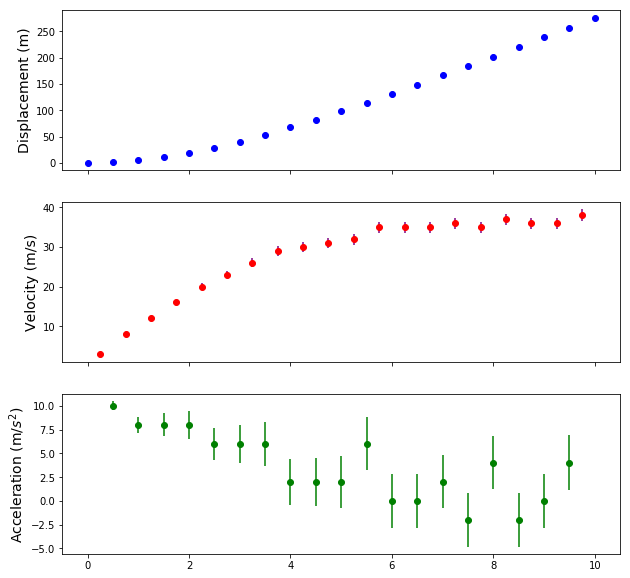

In [138]:
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)

axs[0].errorbar(time, position, yerr=uncertainty, fmt='bo', ecolor="red")
axs[1].errorbar(midtime, velocity, yerr=v_err, fmt='ro', ecolor="purple")
axs[2].errorbar(midtime2, acceleration,yerr=a_err, fmt='go')
axs[0].set_ylabel('Displacement (m)', size=14)
axs[1].set_ylabel('Velocity (m/s)', size=14)
axs[2].set_ylabel('Acceleration (m/$s^2$)', size=14)

fig.set_size_inches(10, 10)
plt.show()